<a href="https://colab.research.google.com/github/Beaterxd/Beaterxd/blob/main/Predict_Gold_92_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install**

In [ ]:
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28627 sha256=9a6640b8abcaa676a0d862c081d2135bccf4887496e32fa322fa3bbd0465e6bd
  Stored in directory: /root/.cache/pip/wheels/32/a3/b6/b5b33187f2d42f095fecc236b957b46173fa09e78a106e309f
Successfully built yahoofinancials


**Import libary**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import seaborn as sns

uploade File

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving TickerList.xlsx to TickerList.xlsx


Read File

In [ ]:
ticker = pd.read_excel("TickerList.xlsx")

Show all data

In [ ]:
ticker

,Ticker,Description
0,GC=F,Gold
1,SI=F,Silver
2,CL=F,Crude Oil
3,^GSPC,S&P500
4,^RUT,Russel 2000 Index
5,ZN=F,10 Yr US T-Note futures
6,ZT=F,2 Yr US T-Note Futures
7,PL=F,Platinum
8,HG=F,Copper
9,DX=F,Dollar Index


In [ ]:
names = ticker['Description'].to_list()
ticker = ticker['Ticker'].to_list()
yahoo_Fianancials = YahooFinancials(ticker)
end_date= '2022-03-01'
start_date = '2010-01-01'
data = yahoo_Fianancials.get_historical_price_data(start_date, end_date, 'daily')
date_range = pd.bdate_range(start=start_date,end=end_date)
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [ ]:
for i in ticker:
    aapl_df = pd.DataFrame(data[i]['prices'])[['formatted_date', 'adjclose']]
    aapl_df.columns = ['Date1', i]
    aapl_df['Date1'] = pd.to_datetime(aapl_df['Date1'])
    values = values.merge(aapl_df,how='left',left_on='Date',right_on='Date1')
    values = values.drop('Date1', axis=1)

In [ ]:
names.insert(0,'Date')
values.columns = names
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)

In [ ]:
values

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN,NaN
1,2010-01-04,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,32.7,1.4,697.0,2308.4
2,2010-01-05,1118.1,17.8,81.8,1136.5,638.5,116.2,108.4,1530.8,3.4,77.8,19.4,32.9,1.4,697.6,2308.7
3,2010-01-06,1135.9,18.2,83.2,1137.1,638.0,116.0,108.4,1552.2,3.5,77.7,19.2,33.0,1.4,698.3,2301.1
4,2010-01-07,1133.1,18.3,82.7,1141.7,642.0,115.8,108.4,1553.0,3.4,78.1,19.1,32.8,1.4,697.8,2300.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3168,2022-02-23,1909.2,24.6,92.1,4225.5,1944.1,126.3,107.6,1090.1,4.5,96.2,31.0,46.4,1.1,1275.6,13037.5
3169,2022-02-24,1925.1,24.7,92.8,4288.7,1996.0,126.5,107.7,1060.4,4.5,97.1,30.3,45.4,1.1,1236.5,13473.6
3170,2022-02-25,1886.5,24.0,91.6,4384.6,2040.9,126.2,107.6,1048.9,4.5,96.6,27.6,46.2,1.1,1275.8,13694.6
3171,2022-02-28,1899.4,24.4,95.7,4373.9,2048.1,127.5,108.0,1037.8,4.4,96.7,30.1,45.6,1.1,1268.8,13751.4


**Prepare Data**


Drop NA value


In [ ]:
result = values.dropna()

Check exist null values


In [ ]:
result.isnull().sum()

Date                       0
Gold                       0
Silver                     0
Crude Oil                  0
S&P500                     0
Russel 2000 Index          0
10 Yr US T-Note futures    0
2 Yr US T-Note Futures     0
Platinum                   0
Copper                     0
Dollar Index               0
Volatility Index           0
MSCI EM ETF                0
Euro USD                   0
Euronext100                0
Nasdaq                     0
dtype: int64

In [ ]:
result

,Date,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
1,2010-01-04,1117.7,17.4,81.5,1133.0,640.1,115.5,108.3,1517.3,3.4,77.8,20.0,32.7,1.4,697.0,2308.4
2,2010-01-05,1118.1,17.8,81.8,1136.5,638.5,116.2,108.4,1530.8,3.4,77.8,19.4,32.9,1.4,697.6,2308.7
3,2010-01-06,1135.9,18.2,83.2,1137.1,638.0,116.0,108.4,1552.2,3.5,77.7,19.2,33.0,1.4,698.3,2301.1
4,2010-01-07,1133.1,18.3,82.7,1141.7,642.0,115.8,108.4,1553.0,3.4,78.1,19.1,32.8,1.4,697.8,2300.1
5,2010-01-08,1138.2,18.5,82.8,1145.0,644.6,116.0,108.5,1564.6,3.4,77.7,18.1,33.1,1.4,701.4,2317.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,2022-02-22,1906.1,24.3,92.3,4304.8,1980.2,126.5,107.6,1084.5,4.5,96.0,28.8,46.9,1.1,1278.1,13381.5
3168,2022-02-23,1909.2,24.6,92.1,4225.5,1944.1,126.3,107.6,1090.1,4.5,96.2,31.0,46.4,1.1,1275.6,13037.5
3169,2022-02-24,1925.1,24.7,92.8,4288.7,1996.0,126.5,107.7,1060.4,4.5,97.1,30.3,45.4,1.1,1236.5,13473.6
3170,2022-02-25,1886.5,24.0,91.6,4384.6,2040.9,126.2,107.6,1048.9,4.5,96.6,27.6,46.2,1.1,1275.8,13694.6


Find Feature Correlation


In [ ]:
result.corr()

<ipython-input-13-4adbc9422f8b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.corr()


,Gold,Silver,Crude Oil,S&P500,Russel 2000 Index,10 Yr US T-Note futures,2 Yr US T-Note Futures,Platinum,Copper,Dollar Index,Volatility Index,MSCI EM ETF,Euro USD,Euronext100,Nasdaq
Gold,1.000000,0.655223,0.143618,0.426638,0.328467,0.708010,0.418885,0.116826,0.569336,-0.156753,0.376087,0.561077,0.100215,0.178476,0.508827
Silver,0.655223,1.000000,0.614558,-0.249677,-0.276238,0.270360,0.538845,0.724187,0.738015,-0.701646,0.165236,0.114929,0.607930,-0.413293,-0.164652
Crude Oil,0.143618,0.614558,1.000000,-0.431471,-0.393137,-0.258522,0.297152,0.804819,0.660931,-0.854597,-0.164166,-0.062768,0.809261,-0.480740,-0.401789
S&P500,0.426638,-0.249677,-0.431471,1.000000,0.975863,0.325852,-0.228341,-0.689047,0.094028,0.632913,0.012914,0.822397,-0.555637,0.947440,0.989395
Russel 2000 Index,0.328467,-0.276238,-0.393137,0.975863,1.000000,0.225877,-0.284225,-0.679927,0.087873,0.620865,-0.114673,0.834326,-0.532241,0.958835,0.955041
10 Yr US T-Note futures,0.708010,0.270360,-0.258522,0.325852,0.225877,1.000000,0.599449,-0.141270,0.002835,0.153119,0.329545,0.201545,-0.213162,0.124097,0.378761
2 Yr US T-Note Futures,0.418885,0.538845,0.297152,-0.228341,-0.284225,0.599449,1.000000,0.545780,0.334663,-0.466565,0.244359,-0.126996,0.418899,-0.380865,-0.141996
Platinum,0.116826,0.724187,0.804819,-0.689047,-0.679927,-0.141270,0.545780,1.000000,0.588159,-0.928085,0.014919,-0.280010,0.848392,-0.741882,-0.623711
Copper,0.569336,0.738015,0.660931,0.094028,0.087873,0.002835,0.334663,0.588159,1.000000,-0.602437,0.064107,0.502905,0.573628,-0.024095,0.171731
Dollar Index,-0.156753,-0.701646,-0.854597,0.632913,0.620865,0.153119,-0.466565,-0.928085,-0.602437,1.000000,-0.046182,0.198178,-0.945553,0.716480,0.566957


<ipython-input-14-1560a6ffbe72>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  result_correlation = result.corr()


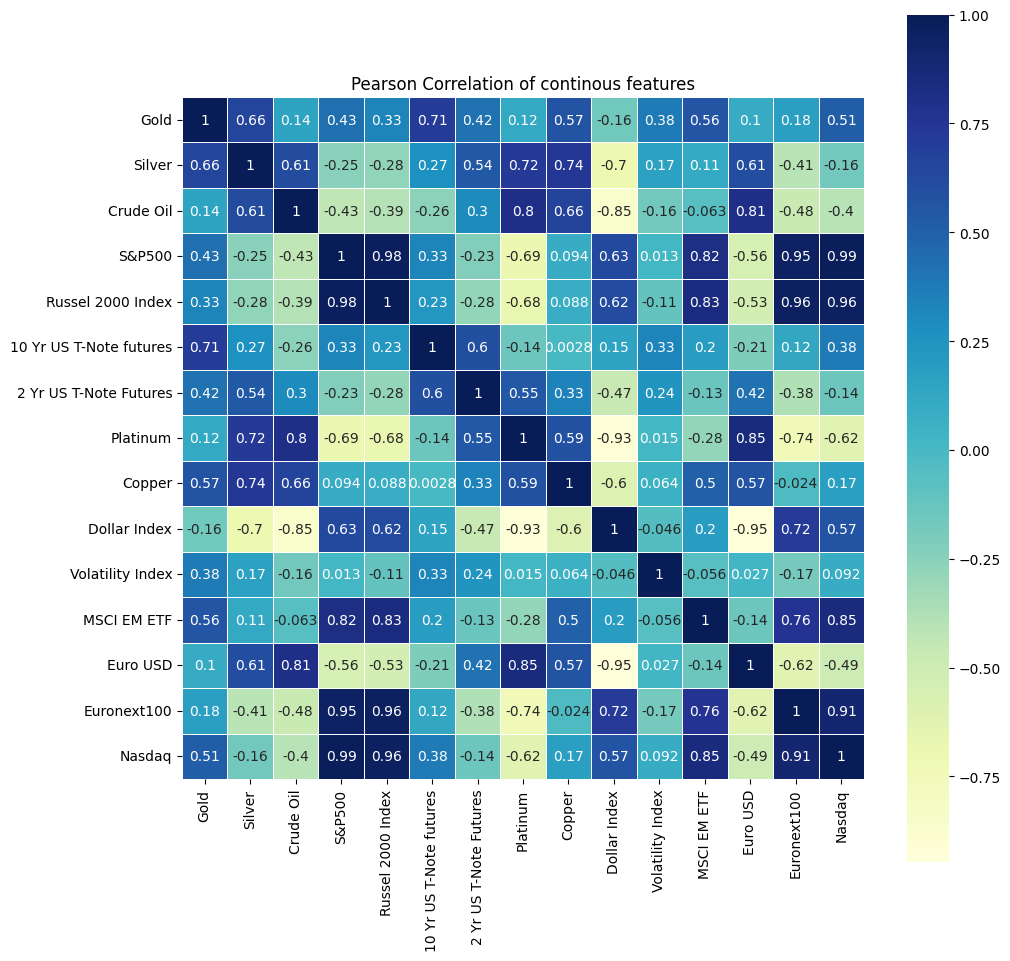

In [ ]:
result_correlation = result.corr() 
plt.subplots(figsize=(11, 11))
plt.title('Pearson Correlation of continous features')
ax = sns.heatmap(result_correlation, 
                 annot=True, 
                 linewidths=.5, 
                 cmap="YlGnBu",
                 square=True
                );

Spilt test and train data


In [ ]:
X_train = result.drop('Gold', axis=1)

Select high correlation features
 

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

<ipython-input-16-51bb6761cb8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


5

In [ ]:
corr_features

{'Dollar Index', 'Euro USD', 'Euronext100', 'Nasdaq', 'Russel 2000 Index'}

Nasdaq|S&P500 = 0.99
Nasdaq|Russel 2000 Index = 0.96
Nasdaq|Euronext

Euronext|S&P500 = 0.95
Euronext|Russel 2000 Index = 0.96
Euronext|Nasdaq = 0.91

Russel2000|S&P500 = 0.98 
Russel2000|Euronext = 0.96
Russel2000|Nasdaq = 0.96

S&P500|Russel2000 = 0.98
S&P500|Euronext = 0.95
S&P500|Nasdaq =  0.99



In [ ]:
#cols=result[['Date','Gold','Silver','S&P500','Russel 2000 Index','10 Yr US T-Note futures','2 Yr US T-Note Futures','Copper','Dollar Index','Volatility Index','MSCI EM ETF','Nasdaq']]

Choose high correlation feature to calculate long term historical return


In [ ]:
cols=result[['Date','Gold','Silver','10 Yr US T-Note futures','Copper','MSCI EM ETF','Nasdaq','S&P500','2 Yr US T-Note Futures']]

In [ ]:
imp = cols.columns.drop('Date')

# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=result['Date'])
for i in change_days:
 print(data.shape)
 x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
 data=pd.concat(objs=(data,x),axis=1)
 x=[]
print(data.shape)

# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
 print(data.shape)
 x= result[imp].pct_change(periods=i).add_suffix('-T-'+str(i))
 data=pd.concat(objs=(data,x),axis=1)
 x=[]
print(data.shape)

(2653, 1)
(2653, 6)
(2653, 11)
(2653, 16)
(2653, 21)
(2653, 26)
(2653, 26)
(2653, 34)
(2653, 42)
(2653, 50)
(2653, 58)


<ipython-input-20-963a3d4de04e>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-20-963a3d4de04e>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-20-963a3d4de04e>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-20-963a3d4de04e>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
<ipython-input-20-963a3d4de04e>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a 

In [ ]:
data

,Date,Nasdaq-T-1,Russel 2000 Index-T-1,Euronext100-T-1,Dollar Index-T-1,Euro USD-T-1,Nasdaq-T-3,Russel 2000 Index-T-3,Euronext100-T-3,Dollar Index-T-3,...,S&P500-T-180,2 Yr US T-Note Futures-T-180,Gold-T-250,Silver-T-250,10 Yr US T-Note futures-T-250,Copper-T-250,MSCI EM ETF-T-250,Nasdaq-T-250,S&P500-T-250,2 Yr US T-Note Futures-T-250
1,2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-05,0.000130,-0.002500,0.000861,0.000000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-06,-0.003292,-0.000783,0.001003,-0.001285,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-01-07,-0.000435,0.006270,-0.000716,0.005148,0.0,-0.003596,0.002968,0.001148,0.003856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2010-01-08,0.007434,0.004050,0.005159,-0.005122,0.0,0.003682,0.009554,0.005447,-0.001285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,2022-02-22,-0.012297,-0.014483,-0.018658,0.000000,0.0,-0.052577,-0.047660,-0.030052,0.003135,...,0.027987,-0.025362,0.014045,-0.068966,-0.082669,0.250000,-0.040900,0.041346,0.155031,-0.026244
3168,2022-02-23,-0.025707,-0.018230,-0.001956,0.002083,0.0,-0.049516,-0.041418,-0.027077,0.004175,...,0.009267,-0.025362,0.009625,-0.071698,-0.084783,0.285714,-0.062626,0.013015,0.132235,-0.026244
3169,2022-02-24,0.033450,0.026696,-0.030652,0.009356,0.0,-0.005499,-0.006619,-0.050599,0.011458,...,0.025220,-0.024457,0.016903,-0.060837,-0.083997,0.285714,-0.082828,0.045413,0.141796,-0.025339
3170,2022-02-25,0.016402,0.022495,0.031783,-0.005149,0.0,0.023398,0.030653,-0.001800,0.006250,...,0.045770,-0.025362,-0.029927,-0.120879,-0.086169,0.250000,-0.072289,0.078442,0.184835,-0.026244


In [ ]:
# # Get the 26-day EMA of the closing price
# k = data['Gold-T-1'].ewm(span=12, adjust=False, min_periods=12).mean()
# # Get the 12-day EMA of the closing price
# d = data['Gold-T-1'].ewm(span=26, adjust=False, min_periods=26).mean()
# # Subtract the 26-day EMA from the 12-Day EMA to get the MACD
# macd = k - d
# # Get the 9-Day EMA of the MACD for the Trigger line
# macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()
# # Calculate the difference between the MACD - Trigger for the Convergence/Divergence value
# macd_h = macd - macd_s
# # Add all of our new values for the MACD to the dataframe
# data['macd'] = data.index.map(macd)
# data['macd_h'] = data.index.map(macd_h)
# data['macd_s'] = data.index.map(macd_s)
# # View our data
# pd.set_option("display.max_columns", None)
# print(data)

In [ ]:
values = result
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
#Adding Simple Moving Average
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
#Adding Exponential Moving Average
moving_avg['Gold/5EMA'] = (values['Gold']/(values['Gold'].ewm(span=5,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/15EMA'] = (values['Gold']/(values['Gold'].ewm(span=15,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/50EMA'] = (values['Gold']/(values['Gold'].ewm(span=50,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/200EMA'] = (values['Gold']/(values['Gold'].ewm(span=200,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)
print(moving_avg.shape)
moving_avg.head(20)

(2474, 10)


,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/5EMA,Gold/15EMA,Gold/50EMA,Gold/200EMA
217,2010-11-02,0.007198,0.027311,0.070553,0.083657,0.138688,0.007554,0.013210,0.047188,0.105149
218,2010-11-03,-0.007291,0.010347,0.053303,0.066918,0.121338,-0.004531,-0.001056,0.030981,0.088266
219,2010-11-04,0.025073,0.041838,0.086499,0.101650,0.158152,0.019421,0.028766,0.063382,0.123707
220,2010-11-05,0.033261,0.049397,0.095077,0.111458,0.168959,0.019923,0.034505,0.071473,0.133750
221,2010-11-08,0.035628,0.050086,0.096240,0.114080,0.172091,0.015832,0.033593,0.072505,0.136355
222,2010-11-09,0.039103,0.051893,0.098109,0.117773,0.176457,0.013838,0.033743,0.074574,0.140114
223,2010-11-10,0.029805,0.040631,0.086408,0.107428,0.166185,0.004087,0.022587,0.063646,0.129711
224,2010-11-11,0.029315,0.040693,0.086215,0.108997,0.168036,0.004628,0.022251,0.063903,0.131171
225,2010-11-12,0.000576,0.010953,0.054553,0.078049,0.135449,-0.015022,-0.004567,0.033884,0.099477
226,2010-11-15,0.000639,0.011385,0.054384,0.079094,0.136758,-0.008609,-0.002083,0.034688,0.100578


In [ ]:
# values = result
# #Calculating Moving averages for Gold
# moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
# moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
# #Adding Simple Moving Average
# moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
# moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
# moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
# moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
# moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
# #Adding Exponential Moving Average
# moving_avg['Gold/90EMA'] = (values['Gold']/(values['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
# moving_avg['Gold/180EMA'] = (values['Gold']/(values['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
# moving_avg = moving_avg.dropna(axis=0)
# print(moving_avg.shape)
# moving_avg.head(20)

In [ ]:
#Merging Moving Average values to the feature space
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
print(data.shape)
data.isna().sum()

(2653, 67)


Date                       0
Nasdaq-T-1                 1
Russel 2000 Index-T-1      1
Euronext100-T-1            1
Dollar Index-T-1           1
                        ... 
Gold/180SMA              179
Gold/5EMA                179
Gold/15EMA               179
Gold/50EMA               179
Gold/200EMA              179
Length: 67, dtype: int64

Calcalate forward return for target


In [ ]:
#Calculating forward returns for Target
y = pd.DataFrame(data=values['Date'])
y['Gold-T+14']=values['Gold'].pct_change(periods=-14)
y['Gold-T+22']=values['Gold'].pct_change(periods=-22)
print(y.shape)
y.isna().sum()

# Removing NAs

data = data[data['Gold-T-250'].notna()]
y = y[y['Gold-T+22'].notna()]

#Adding Target Variables
data = pd.merge(left=data,right=y,how='inner',on='Date',suffixes=(False,False))
print(data)

(2653, 3)
           Date  Nasdaq-T-1  Russel 2000 Index-T-1  Euronext100-T-1  \
0    2011-02-15   -0.004544              -0.007144         0.002461   
1    2011-02-16    0.007560               0.010244         0.007911   
2    2011-02-17    0.002123               0.006760         0.001894   
3    2011-02-18    0.000812               0.000959         0.000135   
4    2011-02-22   -0.027347              -0.026114        -0.020662   
...         ...         ...                    ...              ...   
2376 2022-01-20   -0.012991              -0.018809         0.006966   
2377 2022-01-21   -0.027208              -0.017836        -0.017514   
2378 2022-01-24    0.006260               0.022939        -0.039098   
2379 2022-01-25   -0.022793              -0.014507         0.003742   
2380 2022-01-26    0.000207              -0.013723         0.020657   

      Dollar Index-T-1  Euro USD-T-1  Nasdaq-T-3  Russel 2000 Index-T-3  \
0             0.000000     -0.071429    0.005017              

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.5/483.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00

Chooes 22 days  as target

In [ ]:
from pycaret.regression import *

#We have two target columns. We will remove the T+14 day Target
data_22= data.drop(['Gold-T+14'],axis=1)

In [ ]:
data_22

,Date,Nasdaq-T-1,Russel 2000 Index-T-1,Euronext100-T-1,Dollar Index-T-1,Euro USD-T-1,Nasdaq-T-3,Russel 2000 Index-T-3,Euronext100-T-3,Dollar Index-T-3,...,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/5EMA,Gold/15EMA,Gold/50EMA,Gold/200EMA,Gold-T+22
0,2011-02-15,-0.004544,-0.007144,0.002461,0.000000,-0.071429,0.005017,0.008982,0.002461,0.005109,...,0.018316,0.012022,0.001245,0.005372,0.062599,0.006410,0.012002,0.010023,0.051308,-0.029875
1,2011-02-16,0.007560,0.010244,0.007911,-0.005083,0.000000,0.005766,0.007663,0.010115,-0.003817,...,0.017036,0.012927,0.001782,0.005630,0.062415,0.004799,0.011193,0.010402,0.051556,-0.036110
2,2011-02-17,0.002123,0.006760,0.001894,-0.002554,0.076923,0.005111,0.009807,0.012305,-0.007624,...,0.021095,0.020012,0.008671,0.012375,0.069031,0.008040,0.016192,0.017044,0.058528,-0.029982
3,2011-02-18,0.000812,0.000959,0.000135,-0.005122,0.000000,0.010519,0.018049,0.009956,-0.012706,...,0.021291,0.022168,0.010846,0.014528,0.070655,0.007034,0.016377,0.018831,0.060502,-0.034564
4,2011-02-22,-0.027347,-0.026114,-0.020662,0.001287,0.000000,-0.024490,-0.018590,-0.018674,-0.006386,...,0.026980,0.030416,0.019518,0.023068,0.079038,0.010581,0.022140,0.026737,0.069092,-0.023906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2022-01-20,-0.012991,-0.018809,0.006966,0.002094,0.000000,-0.049672,-0.064046,0.001548,0.005252,...,0.014455,0.021302,0.019700,0.025822,0.025070,0.006594,0.013473,0.020294,0.024680,-0.033367
2377,2022-01-21,-0.027208,-0.017836,-0.017514,-0.001045,0.000000,-0.050872,-0.051665,-0.009276,-0.001045,...,0.007857,0.014464,0.013537,0.019759,0.018787,0.000499,0.006633,0.013798,0.018540,-0.040541
2378,2022-01-24,0.006260,0.022939,-0.039098,0.003138,0.000000,-0.033835,-0.014204,-0.049352,0.004188,...,0.012776,0.018684,0.018555,0.025089,0.023946,0.003930,0.010548,0.018507,0.023800,-0.043322
2379,2022-01-25,-0.022793,-0.014507,0.003742,0.000000,0.000000,-0.043429,-0.009881,-0.052395,0.002090,...,0.016838,0.023452,0.024121,0.030931,0.029708,0.006595,0.014481,0.023603,0.029608,-0.017917


**Setup Target**

In [ ]:
a=setup(data_22,target='Gold-T+22',ignore_features=['Date'],session_id=11,profile=True,remove_outliers=True)

,Description,Value
0,Session id,11
1,Target,Gold-T+22
2,Target type,Regression
3,Original data shape,"(2381, 68)"
4,Transformed data shape,"(2297, 67)"
5,Transformed train set shape,"(1582, 67)"
6,Transformed test set shape,"(715, 67)"
7,Ignore features,1
8,Numeric features,66
9,Preprocess,True


Loading profile... Please Wait!
Profiler Failed. No output to show, continue with modeling.


In [ ]:
blacklist_models = ['lightgbm']

Compare models for choose top 3 model

In [ ]:
compare_models( exclude = blacklist_models,turbo=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0128,0.0004,0.0195,0.8213,0.0172,1.9422,1.6830
knn,K Neighbors Regressor,0.0133,0.0004,0.0201,0.8076,0.0164,2.3088,0.1540
xgboost,Extreme Gradient Boosting,0.0159,0.0005,0.0229,0.7534,0.0195,2.0760,2.0530
rf,Random Forest Regressor,0.0158,0.0005,0.0230,0.7501,0.0192,2.5595,5.6170
gbr,Gradient Boosting Regressor,0.0206,0.0008,0.0277,0.6395,0.0235,2.6938,2.2490
ada,AdaBoost Regressor,0.0281,0.0013,0.0355,0.4125,0.0295,3.3173,0.9000
dt,Decision Tree Regressor,0.0227,0.0014,0.0372,0.3478,0.0230,3.5047,0.3780
lr,Linear Regression,0.0330,0.0018,0.0429,0.1423,0.0332,3.8828,1.1600
br,Bayesian Ridge,0.0332,0.0019,0.0434,0.1219,0.0337,3.3154,0.1890
huber,Huber Regressor,0.0328,0.0019,0.0435,0.1188,0.0329,3.8154,0.3640


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=11)

Create top 3 model

In [ ]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0127,0.0004,0.0200,0.8004,0.0159,0.7329
1,0.0124,0.0003,0.0173,0.8769,0.0157,0.6762
2,0.0126,0.0003,0.0169,0.8537,0.0152,1.4743
3,0.0122,0.0004,0.0209,0.7864,0.0175,2.5790
4,0.0132,0.0004,0.0194,0.8376,0.0169,3.8534
5,0.0110,0.0002,0.0158,0.8500,0.0147,1.4728
6,0.0149,0.0006,0.0252,0.7464,0.0223,2.9281
7,0.0140,0.0004,0.0209,0.8010,0.0189,1.9642
8,0.0113,0.0002,0.0152,0.8954,0.0137,1.4487


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0135,0.0005,0.0216,0.7687,0.0153,1.1098
1,0.0142,0.0004,0.0194,0.8442,0.0176,1.0091
2,0.0124,0.0003,0.0181,0.8316,0.0153,1.2260
3,0.0138,0.0006,0.0250,0.6933,0.0163,2.3468
4,0.0129,0.0003,0.0173,0.8705,0.0149,3.2544
5,0.0112,0.0002,0.0156,0.8529,0.0139,1.9167
6,0.0154,0.0008,0.0275,0.6976,0.0207,2.4495
7,0.0138,0.0004,0.0202,0.8148,0.0168,2.1960
8,0.0117,0.0002,0.0154,0.8924,0.0140,4.3052


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0151,0.0005,0.0231,0.7340,0.0178,1.1297
1,0.0158,0.0005,0.0215,0.8088,0.0194,0.8123
2,0.0156,0.0004,0.0206,0.7830,0.0177,1.7092
3,0.0155,0.0006,0.0240,0.7164,0.0207,2.8215
4,0.0154,0.0005,0.0222,0.7875,0.0191,6.2827
5,0.0134,0.0004,0.0191,0.7817,0.0172,1.5371
6,0.0190,0.0010,0.0312,0.6122,0.0216,3.6827
7,0.0166,0.0006,0.0251,0.7124,0.0192,2.1457
8,0.0138,0.0003,0.0184,0.8455,0.0164,2.0476


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tuned model

In [ ]:
# rf_tuned = tune_model(rf, n_iter=150)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:11:43
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


KeyboardInterrupt: ignored

In [ ]:
# et_tuned = tune_model(et, n_iter=150)

In [ ]:
knn_tuned = tune_model(knn, n_iter=150)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0106,0.0003,0.0162,0.8702,0.0137,1.0055
1,0.0131,0.0004,0.0195,0.8428,0.0171,0.8861
2,0.0096,0.0002,0.0138,0.9028,0.0120,1.0993
3,0.0108,0.0004,0.0187,0.8275,0.0164,2.0054
4,0.0112,0.0003,0.0159,0.8905,0.0138,1.6884
5,0.0098,0.0002,0.0133,0.8931,0.0118,1.7287
6,0.0128,0.0005,0.0213,0.8185,0.0192,3.1661
7,0.0117,0.0003,0.0169,0.8702,0.0138,1.4880
8,0.0090,0.0001,0.0119,0.9355,0.0108,1.4755


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


In [ ]:
b = setup(data_22,target='Gold-T+22',ignore_features=['Date'],session_id=11,profile=False)

,Description,Value
0,Session id,11
1,Target,Gold-T+22
2,Target type,Regression
3,Original data shape,"(2381, 68)"
4,Transformed data shape,"(2381, 67)"
5,Transformed train set shape,"(1666, 67)"
6,Transformed test set shape,"(715, 67)"
7,Ignore features,1
8,Numeric features,66
9,Preprocess,True


Blean model

In [ ]:
blend_knn_et = blend_models(estimator_list=[knn_tuned,et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0093,0.0002,0.0131,0.9145,0.0114,0.6904
1,0.0113,0.0002,0.0146,0.9122,0.0125,0.7387
2,0.0094,0.0002,0.0123,0.9224,0.0108,1.0700
3,0.0092,0.0002,0.0124,0.9246,0.0109,2.1260
4,0.0107,0.0002,0.0145,0.9088,0.0129,2.8395
5,0.0092,0.0001,0.0121,0.9125,0.0110,1.4690
6,0.0113,0.0003,0.0160,0.8983,0.0148,3.0826
7,0.0115,0.0003,0.0162,0.8802,0.0139,1.7043
8,0.0091,0.0001,0.0119,0.9356,0.0107,1.6540


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Create stack

In [ ]:
stack2 = stack_models(estimator_list=[blend_knn_et, et, knn_tuned])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0088,0.0002,0.0123,0.9243,0.0108,0.8621
1,0.0100,0.0002,0.0131,0.9290,0.0108,0.7113
2,0.0089,0.0001,0.0115,0.9324,0.0105,1.0365
3,0.0090,0.0001,0.0118,0.9315,0.0103,1.7839
4,0.0101,0.0002,0.0144,0.9098,0.0123,2.9239
5,0.0097,0.0002,0.0125,0.9056,0.0113,1.8818
6,0.0110,0.0002,0.0150,0.9102,0.0138,3.7038
7,0.0108,0.0002,0.0152,0.8953,0.0128,1.9584
8,0.0086,0.0001,0.0115,0.9402,0.0104,1.4718


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
save_model(model=stack2, model_name='22Day Regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Nasdaq-T-1',
                                              'Russel 2000 Index-T-1',
                                              'Euronext100-T-1',
                                              'Dollar Index-T-1', 'Euro USD-T-1',
                                              'Nasdaq-T-3',
                                              'Russel 2000 Index-T-3',
                                              'Euronext100-T-3',
                                              'Dollar Index-T-3', 'Euro USD-T-3',
                                              'Nasdaq-T-5',
                                              'Russel 2000 Index-T-5',
                                              'Euronext100-T-5',
                                              'Dollar Index-T-5', 'Eur...
                                                                                    

Making Prediction on New Data

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving TickerList.xlsx to TickerList (1).xlsx


In [ ]:
ticker = pd.read_excel("TickerList.xlsx")

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from yahoofinancials import YahooFinancials

In [ ]:
names = ticker['Description'].to_list()
ticker = ticker['Ticker'].to_list()

#end_date= datetime.strftime(datetime.today(),'%Y-%m-%d')
end_date= '2022-03-01'
start_date = '2010-01-01'
yahoo_Fianancials = YahooFinancials(ticker)
date_range = pd.bdate_range(start=start_date,end=end_date)
data = yahoo_Fianancials.get_historical_price_data(start_date, end_date, 'daily')
values = pd.DataFrame({ 'Date': date_range})
values['Date']= pd.to_datetime(values['Date'])

In [ ]:
for i in ticker:
    aapl_df = pd.DataFrame(data[i]['prices'])[['formatted_date', 'adjclose']]
    aapl_df.columns = ['Date1', i]
    aapl_df['Date1'] = pd.to_datetime(aapl_df['Date1'])
    values = values.merge(aapl_df,how='left',left_on='Date',right_on='Date1')
    values = values.drop('Date1', axis=1)

In [ ]:
names.insert(0,'Date')
values.columns = names
cols=values.columns.drop('Date')
values[cols] = values[cols].apply(pd.to_numeric,errors='coerce').round(decimals=1)

In [ ]:
values = values.dropna()

In [ ]:
X_train = values.drop('Gold', axis=1)

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

5

In [ ]:
cols=result[['Date','Gold','Silver','10 Yr US T-Note futures','Copper','MSCI EM ETF','Nasdaq','S&P500','2 Yr US T-Note Futures']]

In [ ]:
imp = cols.columns.drop('Date')

# Calculating Short term -Historical Returns
change_days = [1,3,5,14,21]

data = pd.DataFrame(data=result['Date'])
for i in change_days:
 print(data.shape)
 x= result[corr_features].pct_change(periods=i).add_suffix('-T-'+str(i))
 data=pd.concat(objs=(data,x),axis=1)
 x=[]
print(data.shape)

# Calculating Long term Historical Returns
change_days = [60,90,180,250]

for i in change_days:
 print(data.shape)
 x= result[imp].pct_change(periods=i).add_suffix('-T-'+str(i))
 data=pd.concat(objs=(data,x),axis=1)
 x=[]
print(data.shape)

(2653, 1)
(2653, 6)
(2653, 11)
(2653, 16)
(2653, 21)
(2653, 26)
(2653, 26)
(2653, 34)
(2653, 42)
(2653, 50)
(2653, 58)


In [ ]:
values = result
#Calculating Moving averages for Gold
moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
#Adding Simple Moving Average
moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
#Adding Exponential Moving Average
moving_avg['Gold/5EMA'] = (values['Gold']/(values['Gold'].ewm(span=5,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/15EMA'] = (values['Gold']/(values['Gold'].ewm(span=15,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/50EMA'] = (values['Gold']/(values['Gold'].ewm(span=50,adjust=True,ignore_na=True).mean()))-1
moving_avg['Gold/200EMA'] = (values['Gold']/(values['Gold'].ewm(span=200,adjust=True,ignore_na=True).mean()))-1
moving_avg = moving_avg.dropna(axis=0)
print(moving_avg.shape)
moving_avg.head(20)

(2474, 10)


,Date,Gold/15SMA,Gold/30SMA,Gold/60SMA,Gold/90SMA,Gold/180SMA,Gold/5EMA,Gold/15EMA,Gold/50EMA,Gold/200EMA
217,2010-11-02,0.007198,0.027311,0.070553,0.083657,0.138688,0.007554,0.013210,0.047188,0.105149
218,2010-11-03,-0.007291,0.010347,0.053303,0.066918,0.121338,-0.004531,-0.001056,0.030981,0.088266
219,2010-11-04,0.025073,0.041838,0.086499,0.101650,0.158152,0.019421,0.028766,0.063382,0.123707
220,2010-11-05,0.033261,0.049397,0.095077,0.111458,0.168959,0.019923,0.034505,0.071473,0.133750
221,2010-11-08,0.035628,0.050086,0.096240,0.114080,0.172091,0.015832,0.033593,0.072505,0.136355
222,2010-11-09,0.039103,0.051893,0.098109,0.117773,0.176457,0.013838,0.033743,0.074574,0.140114
223,2010-11-10,0.029805,0.040631,0.086408,0.107428,0.166185,0.004087,0.022587,0.063646,0.129711
224,2010-11-11,0.029315,0.040693,0.086215,0.108997,0.168036,0.004628,0.022251,0.063903,0.131171
225,2010-11-12,0.000576,0.010953,0.054553,0.078049,0.135449,-0.015022,-0.004567,0.033884,0.099477
226,2010-11-15,0.000639,0.011385,0.054384,0.079094,0.136758,-0.008609,-0.002083,0.034688,0.100578


In [ ]:
# values = result
# #Calculating Moving averages for Gold
# moving_avg = pd.DataFrame(values['Date'],columns=['Date'])
# moving_avg['Date']=pd.to_datetime(moving_avg['Date'],format='%Y-%b-%d')
# #Adding Simple Moving Average
# moving_avg['Gold/15SMA'] = (values['Gold']/(values['Gold'].rolling(window=15).mean()))-1
# moving_avg['Gold/30SMA'] = (values['Gold']/(values['Gold'].rolling(window=30).mean()))-1
# moving_avg['Gold/60SMA'] = (values['Gold']/(values['Gold'].rolling(window=60).mean()))-1
# moving_avg['Gold/90SMA'] = (values['Gold']/(values['Gold'].rolling(window=90).mean()))-1
# moving_avg['Gold/180SMA'] = (values['Gold']/(values['Gold'].rolling(window=180).mean()))-1
# #Adding Exponential Moving Average
# moving_avg['Gold/90EMA'] = (values['Gold']/(values['Gold'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
# moving_avg['Gold/180EMA'] = (values['Gold']/(values['Gold'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
# moving_avg = moving_avg.dropna(axis=0)
# print(moving_avg.shape)
# moving_avg.head(20)

In [ ]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%b-%d')
data = pd.merge(left=data,right=moving_avg,how='left',on='Date')
data = data[data['Gold-T-250'].notna()]
prediction_data = data.copy()

In [ ]:
#Loading the stored model
regressor_22 = load_model("22Day Regressor");

#Making Predictions
predicted_return_22 = predict_model(regressor_22,data=prediction_data)
predicted_return_22=predicted_return_22[['Date','prediction_label']]
predicted_return_22.columns = ['Date','Return_22']

#Adding return Predictions to Gold Values
predicted_values = result[['Date','Gold']]
predicted_values = predicted_values.tail(len(predicted_return_22))
predicted_values = pd.merge(left=predicted_values,right=predicted_return_22,on=['Date'],how='inner')
predicted_values['Gold-T+22']=(predicted_values['Gold']*(1+predicted_values['Return_22'])).round(decimals =1)

#Adding T+22 Date
from datetime import datetime, timedelta

predicted_values['Date-T+22'] = predicted_values['Date']+timedelta(days = 22)
predicted_values.tail()

Transformation Pipeline and Model Successfully Loaded


,Date,Gold,Return_22,Gold-T+22,Date-T+22
2398,2022-02-22,1906.1,-0.013483,1880.4,2022-03-16
2399,2022-02-23,1909.2,-0.017323,1876.1,2022-03-17
2400,2022-02-24,1925.1,-0.006647,1912.3,2022-03-18
2401,2022-02-25,1886.5,-0.026410,1836.7,2022-03-19
2402,2022-02-28,1899.4,-0.013008,1874.7,2022-03-22
